In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten

Using TensorFlow backend.


In [2]:
train=pd.read_csv("C:/Users/PARIKALP/AppData/Local/Programs/Python/Scripts/sign-language-mnist/sign_mnist_train.csv")
test=pd.read_csv("C:/Users/PARIKALP/AppData/Local/Programs/Python/Scripts/sign-language-mnist/sign_mnist_test.csv")

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
train.shape

(27455, 785)

In [5]:
labels=train["label"].values

In [6]:
labels

array([ 3,  6,  2, ..., 18, 17, 23], dtype=int64)

In [7]:
Label=LabelBinarizer()
labels=Label.fit_transform(labels)

In [8]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [9]:
train.drop("label",axis=1,inplace=True)

In [10]:
image=train.values

In [11]:
image.shape

(27455, 784)

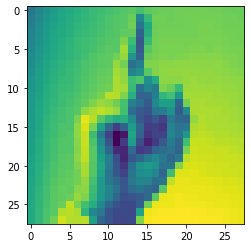

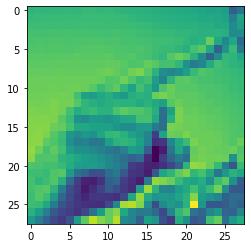

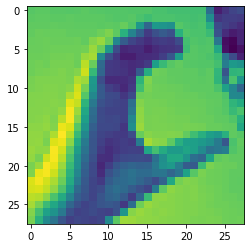

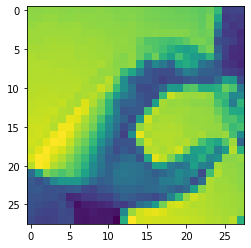

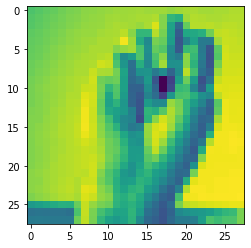

In [12]:
for i in range(5):
    plt.imshow(image[i].reshape(28,28))
    plt.show()

In [13]:
image=image/255

In [14]:
x_train,x_test,y_train,y_test=train_test_split(image,labels,test_size=0.3,random_state=0)

In [15]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_train.shape

(19218, 28, 28, 1)

In [16]:
num_classes = 24
batch_size = 125
epochs = 10

In [17]:
model=Sequential()
model.add(Conv2D(64,activation="relu",kernel_size=(4,4),input_shape=(28,28,1),padding="SAME"))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(4,4),activation="relu"))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss = "categorical_crossentropy", optimizer='nadam',
              metrics=['accuracy'])

W0924 23:29:12.691606  4072 deprecation_wrapper.py:119] From c:\users\parikalp\appdata\local\programs\python\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0924 23:29:12.715615  4072 deprecation_wrapper.py:119] From c:\users\parikalp\appdata\local\programs\python\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0924 23:29:12.718559  4072 deprecation_wrapper.py:119] From c:\users\parikalp\appdata\local\programs\python\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0924 23:29:12.738480  4072 deprecation_wrapper.py:119] From c:\users\parikalp\appdata\local\programs\python\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf

In [18]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

W0924 23:29:14.029889  4072 deprecation.py:323] From c:\users\parikalp\appdata\local\programs\python\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 19218 samples, validate on 8237 samples
Epoch 1/10
19218/19218 [==============================] - 71s 4ms/step - loss: 2.4615 - acc: 0.2387 - val_loss: 2.0999 - val_acc: 0.5827
Epoch 2/10
19218/19218 [==============================] - 70s 4ms/step - loss: 1.1139 - acc: 0.6237 - val_loss: 1.3365 - val_acc: 0.7701
Epoch 3/10
19218/19218 [==============================] - 70s 4ms/step - loss: 0.6332 - acc: 0.7839 - val_loss: 0.9952 - val_acc: 0.9172
Epoch 4/10
19218/19218 [==============================] - 70s 4ms/step - loss: 0.4057 - acc: 0.8581 - val_loss: 0.6988 - val_acc: 0.9561
Epoch 5/10
19218/19218 [==============================] - 70s 4ms/step - loss: 0.3032 - acc: 0.8942 - val_loss: 0.4932 - val_acc: 0.9882
Epoch 6/10
19218/19218 [==============================] - 70s 4ms/step - loss: 0.2334 - acc: 0.9178 - val_loss: 0.4117 - val_acc: 0.9798
Epoch 7/10
19218/19218 [==============================] - 70s 4ms/step - loss: 0.2315 - acc: 0.9193 - val_loss: 0.3490 - val_acc:

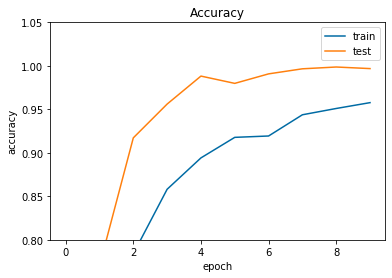

In [19]:
plt.style.use('tableau-colorblind10')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylim(0.80, 1.05)
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()